In [1]:
from greenlearning.utils import DataProcessor
from greenlearning.model import *
from chebpy2 import Chebfun2, cheb2prefs
import matplotlib.pyplot as plt

%env TF_MLC_LOGGING=1
%env TF_CPP_MIN_LOG_LEVEL=2

env: TF_MLC_LOGGING=1
env: TF_CPP_MIN_LOG_LEVEL=2


In [2]:
model = Model(loadPath = "savedmodel")

Metal device set to: Apple M1 Pro


In [3]:
%%time
g = Chebfun2(model.evaluateG, domain = [0, 1, 0, 1], prefs = cheb2prefs)

CPU times: user 393 ms, sys: 94.9 ms, total: 488 ms
Wall time: 416 ms


In [4]:
xx = np.linspace(0,1,2000)
yy = np.linspace(0,1,2000)
x, y = np.meshgrid(xx,yy)

In [5]:
Gneural = model.evaluateG(x,y)

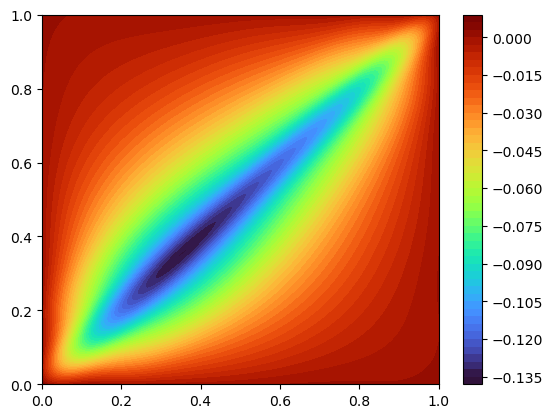

In [6]:
plt.contourf(x,y,Gneural, 50, cmap = 'turbo', vmin = np.min(Gneural), vmax = np.max(Gneural))
plt.colorbar()

In [7]:
%%time
G = g[x,y]

CPU times: user 289 ms, sys: 43.4 ms, total: 332 ms
Wall time: 74.6 ms


In [8]:
%%time
G = g[x,y]

CPU times: user 337 ms, sys: 15.3 ms, total: 353 ms
Wall time: 81.2 ms


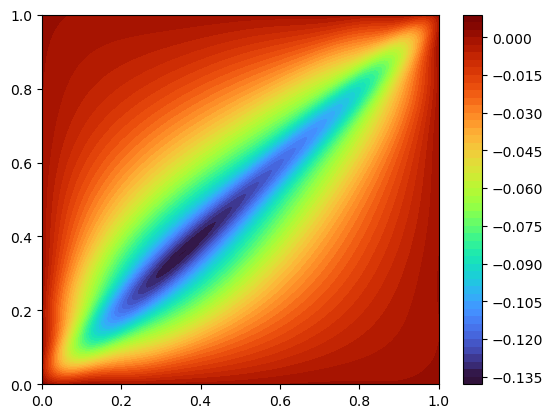

In [9]:
plt.contourf(x,y,G, 50, cmap = 'turbo', vmin = np.min(G), vmax = np.max(G))
plt.colorbar()